# Módulo 2 do Trabalho Prático

Neste trabalho, a DCT (direta e inversa) deve ser desenvolvida utilizando as equações estudadas em sala de aula, sem o uso de bibliotecas prontas para este fim. 

1 Dado um sinal de áudio s com N amostras, desenvolva uma aplicação para:

 a) Exibir a DCT de s e o valor do nível DC;

b) Encontrar uma aproximação ? de s obtida preservando os n (parâmetro inteiro no intervalo [0, N-1]) coeficientes AC (da DCT) mais importantes de s e zerando os demais coeficientes AC. Para audição, o sinal resultante deve ser multiplicado por uma constante c tal que (volume de ?) = (volume de s)

2 Dada uma imagem I de dimensões RxC, desenvolva uma aplicação para:

a) Exibir a DCT de s, sem o nível DC, e o valor do nível DC;

b) Encontrar e exibir uma aproximação de I obtida preservando os n coeficientes AC (da DCT) mais importantes de I e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1].

3 Desenvolva um compactador/expansor de frequências para sinais de áudio, em que Xt[round(k*c)] = X[k], c real, c > 0. A dimensão do vetor Xt deve ser igual à do vetor X.


In [1]:
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import scipy.io.wavfile
from scipy import fftpack
import pydub
from pydub.playback import play
import math

# Calcula DCT 1D

In [45]:
def dct1D(vector):
    N = len(vector)
    X = np.zeros(N)
    Ak = math.sqrt(2.0/N)
    for k in range(N):
        print(k + 1, " | ", N , end="\r")
        
        if k == 0:
            Ck = math.sqrt(1/2)
        else:
            Ck = 1
            
        somatorio = 0
        for n in range(N):
            
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            twoN = 2.0 * N
            
            
            somatorio += vector[n] * math.cos((q/twoN) + (w/twoN))
            
            #sum += vector[n] * math.cos(((2*math.pi*k*n)/2*N)+((k*math.pi)/2*N))
        X[k] = Ak * Ck * somatorio

    return X

# Calcula IDCT

In [46]:
def idct1D(X):

    N = len(X)
    x = np.zeros(N)

    Ak = math.sqrt(2.0/N)
    
    for n in range(N):
        print(n + 1 , " | ", N, end="\r")
        somatorio = 0
        for k in range(N):
            
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            twoN = 2.0 * N
            
            
            if k == 0:
                Ck = math.sqrt(1.0/2.0)
            else:
                Ck = 1.0
            
            somatorio += Ck * X[k] * math.cos((q/twoN)+(w/twoN))
            
            
        x[n] = Ak * somatorio

    return x

In [47]:
# Calcula DCT 2D

In [6]:
def dct2d(imagem):
    # Criando A imagem no dominio da frequencia
    ImagemDCT = np.zeros(imagem.shape)

    # Aplicando DCT Verticalmente nas linhas
    for i, linha in enumerate(imagem):
        ImagemDCT[i] = dct1D(linha)

    ImagemDCT_Trans = ImagemDCT.T

    # Aplicando DCT Verticalmente nas Colunas
    for i, linha in enumerate(ImagemDCT_Trans):
        ImagemDCT_Trans[i] = dct1D(linha)

    
    # Necessario retornar a transposta
    return ImagemDCT_Trans.T

In [7]:
# Calcula IDCT 2d

In [8]:
def idct2d(imagem):
    # Aplicando IDCT Verticalmente nas linhas
    imagemIDCT = np.zeros(imagem.shape)
    for i, linha in enumerate(imagem):
        #print(i)
        imagemIDCT[i] = idct1D(linha)
        #imagemIDCT[i] = fftpack.idct(linha)

    imagemIDCT_Trans = imagemIDCT.T

    # Aplicando DCT Verticalmente nas Colunas
    for i, linha in enumerate(imagemIDCT_Trans):
        #print(i)
        imagemIDCT_Trans[i] = idct1D(linha)
        #imagemIDCT_Trans[i] = fftpack.idct(linha)

    return imagemIDCT_Trans.T

# Compactador/Expansor

In [9]:
def Compactador(X,c):
    K = len(X)
    for i in range(K):
        #Se a posição nao existir 
        if(round(i*c) >= K): # multiplica pela constante c
            X[i] = 0.0;
        else:
            X[i] = X[round(i*c)];
            
    return X

# Função para plotagem do gráfico com a DCT Filtrada

In [10]:
def plotaDCTs(dct1, dct2):

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(dct1, linewidth=0.1, alpha=1.0, color='blue')
  
    ax2.plot(dct2, linewidth=0.1, alpha=1.0, color='blue')
    plt.show()

In [11]:
def desenhaGrafico(nomeArquivo, data):
    plt.figure(nomeArquivo, figsize=(20,6))
    plt.title(nomeArquivo)
    plt.plot(data, linewidth=0.1, alpha=1, color='red')
    plt.ylabel('Amplitude')
    plt.xlabel('Dados')
    plt.show()

# Testes com DCT e IDCT

In [18]:
x_slide = []

X_slide = [10, 5, 8.5, 2, 1, 1.5, 0, 0.1]

x_slide = idct1D(X_slide)
x_slide_pack = fftpack.idct(X_slide, norm='ortho')

In [19]:
print("M: ", x_slide)
print("C: ", x_slide_pack)
print(x_slide == x_slide_pack)

M:  [11.52544031  5.92860134  2.15160745  0.4693178  -0.54411923  0.9595444
  3.68816887  4.10571031]
C:  [11.52544031  5.92860134  2.15160745  0.4693178  -0.54411923  0.9595444
  3.68816887  4.10571031]
[False False False False  True False False False]


In [20]:
X_DCT = dct1D(x_slide)
X_DCT

array([ 1.00000000e+01,  5.00000000e+00,  8.50000000e+00,  2.00000000e+00,
        1.00000000e+00,  1.50000000e+00, -1.44328993e-15,  1.00000000e-01])

In [21]:
X_DCT_pack = fftpack.dct(x_slide, norm="ortho")
X_DCT_pack

array([ 1.00000000e+01,  5.00000000e+00,  8.50000000e+00,  2.00000000e+00,
        1.00000000e+00,  1.50000000e+00, -1.77635684e-15,  1.00000000e-01])

In [22]:
X_DCT == X_DCT_pack

array([False, False,  True, False, False, False, False, False])

# DCTAudio

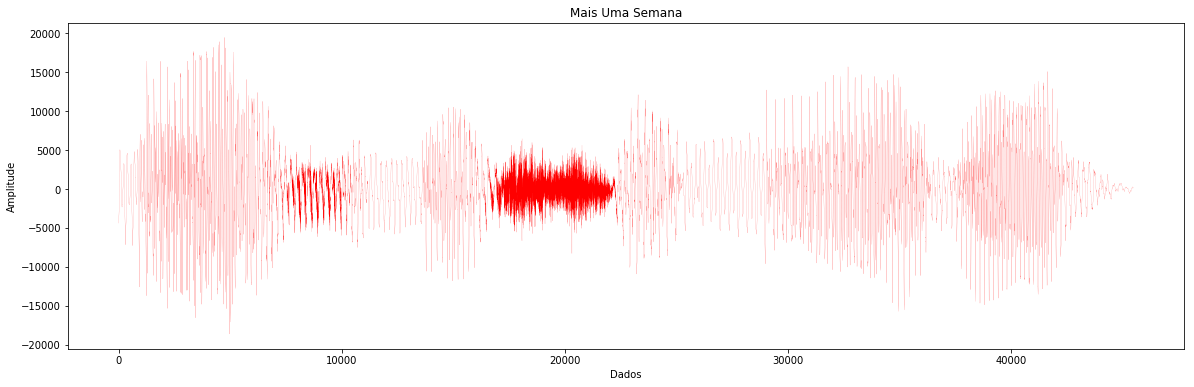

In [54]:
rate, audioData = scipy.io.wavfile.read("MaisUmaSemana.wav")
desenhaGrafico("Mais Uma Semana", audioData)

In [55]:
len(audioData)

45498

In [56]:
prompt = "Digite o tamanho de dados a ser tratado: MAX=" + str(len(audioData)) + " :" 
length = int(input(prompt))
if(length > len(audioData)):
    print("Valor inserido é maior que o limite")
    length = len(audioData)
print(length)

Digite o tamanho de dados a ser tratado: MAX=45498 :20000
20000


In [57]:
len(audioData)
len(audioData[:length])

20000

In [58]:
DCT = dct1D(audioData[:length])

#DCT = fftpack.dct(audioData, norm = 'ortho') #Calcula a Transformada Discreta

In [40]:
#print (DCT)
dctFiltrada = DCT.copy()
# print (dctFiltrada)

In [41]:
listaComDCT = dctFiltrada.tolist() #Cria uma lista com os valores resultantes da Transformada Discreta
#print(listaComDCT)
Indices = []

#Percorre todo o array e troca os valores pelo seu módulo
for i in range(0, len(listaComDCT)):
    listaComDCT[i] = abs(listaComDCT[i])
    aux = listaComDCT.copy()

#print(listaComDCT)

In [42]:
numero_de_frequencias_desejadas = int(input("Digite o numero de frequencias desejadas: "))

Digite o numero de frequencias desejadas: 1000


In [43]:
#Adiciona na lista os n índices de maior valor, com n = numero de amostras
for i in range(0,numero_de_frequencias_desejadas):
    Indices.append(listaComDCT.index(max(aux)))
    indiceAux = aux.index(max(aux))
    aux.pop(indiceAux)

    # dctFiltrada = DCT.copy()

print(Indices)

[179, 175, 79, 178, 180, 211, 190, 78, 184, 183, 174, 176, 207, 158, 192, 172, 140, 165, 322, 214, 244, 209, 77, 331, 185, 333, 203, 139, 167, 169, 206, 327, 216, 205, 213, 170, 141, 324, 195, 380, 316, 199, 117, 189, 161, 40, 217, 150, 329, 45, 96, 155, 95, 319, 148, 387, 318, 138, 171, 313, 219, 197, 379, 87, 326, 153, 210, 182, 186, 377, 354, 196, 201, 388, 321, 325, 220, 94, 98, 194, 338, 85, 336, 371, 127, 373, 93, 142, 147, 83, 340, 90, 97, 44, 187, 146, 39, 241, 384, 335, 86, 229, 198, 133, 262, 88, 275, 193, 82, 232, 46, 212, 334, 228, 317, 328, 208, 118, 52, 365, 233, 361, 149, 269, 366, 177, 271, 252, 80, 157, 132, 50, 309, 312, 181, 42, 348, 151, 273, 152, 278, 393, 204, 200, 343, 285, 66, 126, 188, 320, 64, 350, 131, 308, 385, 237, 54, 51, 247, 234, 345, 114, 274, 304, 236, 123, 406, 358, 396, 128, 73, 315, 257, 53, 399, 258, 145, 223, 100, 267, 360, 168, 222, 55, 341, 266, 288, 99, 242, 38, 400, 407, 370, 119, 156, 68, 240, 224, 287, 249, 374, 238, 71, 137, 143, 402, 239, 

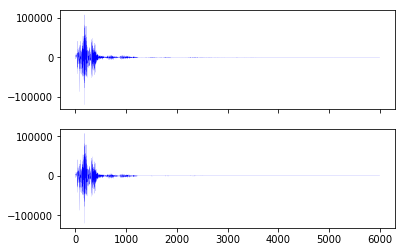

In [44]:
#Preserva os DCT's de tamanho igual aos da lista de IndiceMaximo verificando se eles estão na lista e zera os demais
for i in range(0, len(dctFiltrada)):
    if i not in Indices:
        dctFiltrada[i] = 0

dctFiltrada = np.asarray(dctFiltrada)

#AudioTransformado = fftpack.idct(DCT, norm = 'ortho')
AudioTransformado = idct1D(DCT)
AudioTransformado = AudioTransformado.astype("int16")
scipy.io.wavfile.write("audioTransformado.wav", rate, AudioTransformado)

#AudioTransformadoImportantes = fftpack.idct(dctFiltrada, norm = 'ortho')
AudioTransformadoImportantes = idct1D(dctFiltrada)
AudioTransformadoImportantes = AudioTransformadoImportantes.astype("int16")
scipy.io.wavfile.write("AudioTransformadoImportantes.wav", rate, AudioTransformadoImportantes)

plotaDCTs(DCT, dctFiltrada)

In [48]:
len(DCT)

6000

In [53]:
print("valor DC: ", DCT[0])

valor DC:  9174.193851051255


In [49]:
dctCompactado = Compactador(DCT, 3)

AudioTransformadoCompactado = fftpack.idct(dctCompactado, norm = 'ortho')
#AudioTransformadoImportantes = idct1D(dctFiltrada)
AudioTransformadoCompactado = AudioTransformadoCompactado.astype("int16")
scipy.io.wavfile.write("AudioTransformadoCompactado.wav", rate, AudioTransformadoCompactado)

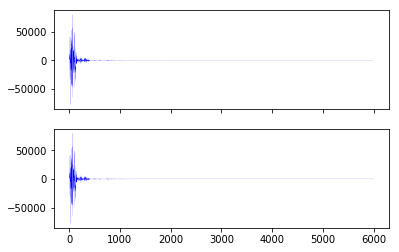

In [50]:
plotaDCTs(DCT, dctCompactado)

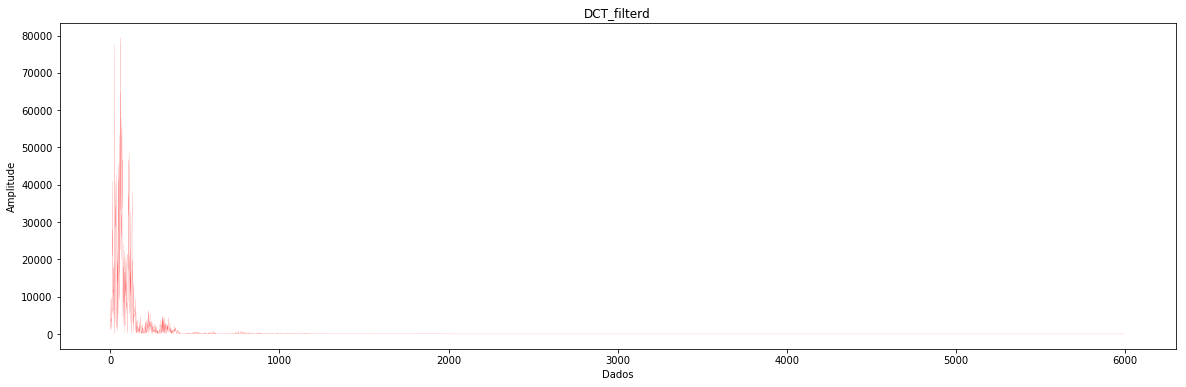

In [51]:
DCT_filtered = DCT.copy()

# Valores modulados
for i in range(len(DCT)):
    DCT_filtered[i] = abs(DCT[i])

DCT_abs = DCT_filtered.copy()
desenhaGrafico("DCT_filterd", DCT_filtered)

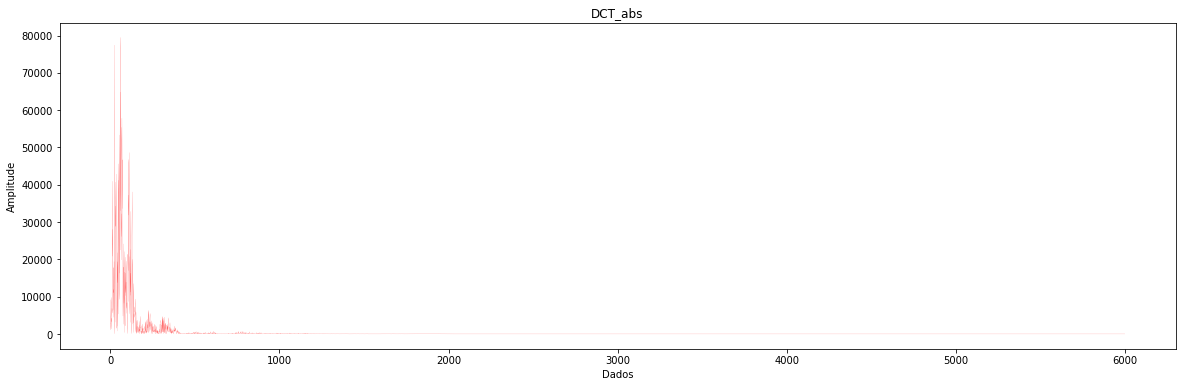

In [52]:
desenhaGrafico("DCT_abs", DCT_abs)

# Questão 2

2 Dada uma imagem I de dimensões RxC, desenvolva uma aplicação para:

a) Exibir a DCT de s, sem o nível DC, e o valor do nível DC;

b) Encontrar e exibir uma aproximação de I obtida preservando os n coeficientes AC (da DCT) mais importantes de I e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1].

In [ ]:
imagem = Image.open("lena.bmp")
imagem = np.asarray(imagem)
print (imagem)

In [ ]:
plt.imshow(imagem, cmap="gray")
plt.show()

## Implementando a DCT 2d

![Gráfico do processo de conversão](https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/Topic5.fig_117.gif)

In [ ]:
plt.imshow(imagem, cmap="gray")
plt.savefig("LenaOrig.png")

In [ ]:
imgDCT = dct2d(imagem)

In [ ]:
print("Valor DC: ", imgDCT[0][0])

In [ ]:
plt.imshow(imgDCT, cmap="gray")
plt.savefig("imgDCT.png")

In [ ]:
imgDCT_semDC = imgDCT.copy()
imgDCT_semDC[0][0] = 0

In [ ]:
plt.imshow(imgDCT_semDC, cmap="gray")
plt.savefig("imgDCT_semDC.png")

In [ ]:
imgIDCT = idct2d(imgDCT)

In [ ]:
plt.imshow(imgIDCT, cmap="gray")
plt.savefig("imgIDCT.png")

b) Encontrar e exibir uma aproximação de I obtida preservando os n coeficientes AC (da DCT) mais importantes de I e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1].

### Passos do Algorítimo

1- Calcular a transformada DCT da imagem (RxC)

2- Criar uma matriz auxiliar de dimensão (RxC) que irá armazenar os índices seguindo uma ordem crescente de valores, ou seja, ordenando os pontos de acordo com seu valor na matriz

3- Criar um filtro binario que elimina os valores a partir de N, e realizar uma multiplicação da imagem pelo filtro binário.

In [ ]:
LenaDCT = imgDCT

In [ ]:
plt.imshow(fftpack.idctn(LenaDCT), cmap="gray")

In [ ]:
auxMatrix = []
for i in range(len(LenaDCT)):
    for j in range(len(LenaDCT)):
        auxMatrix.append([i, j, LenaDCT[i][j]])

In [ ]:
auxMatrix.sort(key=lambda x: abs(x[2]), reverse=True)

In [ ]:
auxMatrix

In [ ]:
listaComId = []
for index,value in enumerate(auxMatrix):
    listaComId.append([index,*value])

In [ ]:
listaComId

In [ ]:
OriginLenaDCT = np.zeros(LenaDCT.shape)
IndexMatrix = np.zeros(LenaDCT.shape)
for value in listaComId:

    index, i, j, a_value = value
    
    OriginLenaDCT[i][j] = a_value
    IndexMatrix[i][j] = index

In [ ]:
LenaDCT == OriginLenaDCT

In [ ]:
IndexMatrix

In [ ]:
IndexMatrixEdited = IndexMatrix.copy()

n coeficientes AC (da DCT) mais importantes de I e zerando os demais.

In [ ]:
prompt = "Digite o tamanho de dados a ser tratado: MAX=" + str(LenaDCT.shape[1]**2) + " : " 
n = int(input(prompt))
if(n > (LenaDCT.shape[1])**2):
    print("Valor entrado é maior")
    n = (LenaDCT.shape[1])**2
print(n)

In [ ]:
IndexMatrixEdited[IndexMatrixEdited > n] = 0

In [ ]:
IndexMatrixEdited

In [ ]:
IndexMatrixEdited[IndexMatrixEdited > 0] = 1

In [ ]:
IndexMatrixEdited

In [ ]:
LenaDCT_Transform = np.multiply(IndexMatrixEdited, LenaDCT)

In [ ]:
plt.imshow(idct2d(LenaDCT_Transform), cmap="gray")
name_fig = "LenaDCT_Transform"  + str(n)
plt.savefig(name_fig)